In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')


from SALib.sample import saltelli
from SALib.analyze import sobol

import scipy 
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('/Users/casper/Documents/TU Della/Thesis/Finals Docs/Experiments/tables/Final model experiment 5 table-table.csv', skiprows=6 ) 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000100 entries, 0 to 10000099
Data columns (total 49 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   [run number]                                    int64  
 1   walking-radius                                  int64  
 2   prob-of-violating-rules                         int64  
 3   new-car-treshold                                float64
 4   number-of-cars-company0                         int64  
 5   graduated-sanctions                             bool   
 6   car-sharing-demand                              int64  
 7   number-of-companies                             int64  
 8   collective-choice-arrangement                   bool   
 9   One-company                                     bool   
 10  number-of-cars-company1                         int64  
 11  sanctioning-multiple                            int64  
 12  speed                     

In [4]:
df.rename(columns={'[run number]':'run number','[step]':'tick', '[ satisfied-users ] of company 0':'satisfied company 0',  '[ satisfied-users ] of company 1':'satisfied company 1', '[ satisfied-users ] of company 2': 'satisfied company 2', '[ unsatisfied-users ] of company 0':'unsatisfied company 0',  '[ unsatisfied-users ] of company 1':'unsatisfied company 1', '[ unsatisfied-users ] of company 2': 'unsatisfied company 2', 'count cars with [ ( company-id = company 0 ) ]': 'cars company 0', 'count cars with [ ( company-id = company 1 ) ]': 'cars company 1', 'count cars with [ ( company-id = company 2 ) ]': 'cars company 2'  }, inplace= True) 
df ['total satisfied users'] = df['satisfied company 0'] + df['satisfied company 1'] + df['satisfied company 2'] 
df ['total unsatisfied users'] = df['unsatisfied company 0'] + df['unsatisfied company 1'] + df['unsatisfied company 2'] 
df ['total no parking found'] = df['[ no-parking ] of company 0'] + df['[ no-parking ] of company 1'] + df['[ no-parking ] of company 2']
df ['total profit'] = df[ '[ profit ] of company 0'] + df[ '[ profit ] of company 1'] + df[ '[ profit ] of company 2'] 
df.rename(columns={ '[ no-parking ] of company 0': 'no parking company 0', '[ no-parking ] of company 1': 'no parking company 1', '[ no-parking ] of company 2': 'no parking company 2', '[ company-price ] of company 0': 'price company 0', '[ company-price ] of company 1': 'price company 1', '[ company-price ] of company 2': 'price company 2', '[ profit ] of company 0': 'profit company 0', '[ profit ] of company 1': 'profit company 1', '[ profit ] of company 2': 'profit company 2'}, inplace= True)

In [5]:
df1 = df.drop(columns=['walking-radius', 'prob-of-violating-rules', 'new-car-treshold', 'number-of-cars-company0', 'number-of-cars-company1', 'number-of-cars-company2', 'number-of-companies', 'One-company', 'speed', '[ vote ] of company 0', '[ vote ] of company 1', '[ vote ] of company 2', 'prob-of-sanctioning', '[ company-rules-violated ] of company 0', '[ company-rules-violated ] of company 1', '[ company-rules-violated ] of company 2', '[ company-sanctioned ] of company 0', '[ company-sanctioned ] of company 1', '[ company-sanctioned ] of company 2', 'car-sharing-demand'])

In [6]:
list(df1.columns)

['run number',
 'graduated-sanctions',
 'collective-choice-arrangement',
 'sanctioning-multiple',
 'starting-bottom-price',
 'tick',
 'satisfied company 0',
 'unsatisfied company 0',
 'satisfied company 1',
 'unsatisfied company 1',
 'satisfied company 2',
 'unsatisfied company 2',
 'price company 0',
 'price company 1',
 'price company 2',
 'profit company 0',
 'profit company 1',
 'profit company 2',
 'cars company 0',
 'cars company 1',
 'cars company 2',
 'count users',
 'market-price',
 'bottom-price',
 'count cars with [ available = true ]',
 'count patches with [ empty = true ]',
 'no parking company 0',
 'no parking company 1',
 'no parking company 2',
 'total satisfied users',
 'total unsatisfied users',
 'total no parking found',
 'total profit']

In [7]:
df4 = df1.drop(columns=['run number', 'tick', 'satisfied company 0', 'satisfied company 1', 'satisfied company 2', 'unsatisfied company 0', 'unsatisfied company 1', 'unsatisfied company 2', 'price company 0', 'price company 1', 'price company 2', 'profit company 0', 'profit company 1', 'profit company 2', 'cars company 0', 'cars company 1', 'cars company 2'])

In [6]:
spearman = df1.corr(method='spearman')
spearman

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
run number,1.000000e+00,NaN,NaN,8.660687e-01,NaN,4.814736e-16,0.002460,0.001711,0.001009,0.000075,...,-0.055818,-0.015876,0.015241,0.002441,0.001011,-0.001178,0.000770,0.000003,0.000756,-0.131659
graduated-sanctions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collective-choice-arrangement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sanctioning-multiple,8.660687e-01,NaN,NaN,1.000000e+00,NaN,-1.405718e-15,0.001625,0.001128,0.000550,-0.000289,...,-0.044950,-0.010868,0.010601,0.001609,0.000553,-0.001570,0.000210,-0.000413,0.000199,-0.144206
starting-bottom-price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tick,4.814736e-16,NaN,NaN,-1.405718e-15,NaN,1.000000e+00,0.999701,0.999703,0.999713,0.999717,...,0.957357,-0.905163,0.904512,0.999700,0.999713,0.999724,0.999953,0.999958,0.999953,0.964693
satisfied company 0,2.460497e-03,NaN,NaN,1.625393e-03,NaN,9.997011e-01,1.000000,0.999532,0.999273,0.999457,...,0.956465,-0.904672,0.904020,1.000000,0.999273,0.999292,0.999761,0.999725,0.999761,0.963846
unsatisfied company 0,1.711101e-03,NaN,NaN,1.128417e-03,NaN,9.997026e-01,0.999532,1.000000,0.999448,0.999261,...,0.956877,-0.904589,0.903915,0.999531,0.999448,0.999476,0.999725,0.999756,0.999725,0.964222
satisfied company 1,1.009087e-03,NaN,NaN,5.499958e-04,NaN,9.997132e-01,0.999273,0.999448,1.000000,0.999527,...,0.956758,-0.904598,0.903937,0.999272,1.000000,0.999276,0.999756,0.999721,0.999756,0.964317
unsatisfied company 1,7.485216e-05,NaN,NaN,-2.894461e-04,NaN,9.997173e-01,0.999457,0.999261,0.999527,1.000000,...,0.957252,-0.904407,0.903748,0.999456,0.999528,0.999470,0.999724,0.999754,0.999724,0.964866


In [7]:
spearman1 = df4.corr(method='spearman')
spearman1

,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,count users,market-price,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
graduated-sanctions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collective-choice-arrangement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sanctioning-multiple,NaN,NaN,1.000000,NaN,0.000006,-0.123393,-0.044950,-0.010868,0.010601,0.001609,0.000553,-0.001570,0.000210,-0.000413,0.000199,-0.144206
starting-bottom-price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count users,NaN,NaN,0.000006,NaN,1.000000,0.011885,0.048310,-0.386358,0.390631,0.026335,0.026348,0.026378,0.026341,0.026049,0.026341,0.029722
market-price,NaN,NaN,-0.123393,NaN,0.011885,1.000000,0.582652,-0.346640,0.348279,0.467717,0.468894,0.470532,0.469147,0.470062,0.469158,0.556010
bottom-price,NaN,NaN,-0.044950,NaN,0.048310,0.582652,1.000000,-0.857798,0.858036,0.956463,0.956764,0.956978,0.956939,0.957397,0.956943,0.973149
count cars with [ available = true ],NaN,NaN,-0.010868,NaN,-0.386358,-0.346640,-0.857798,1.000000,-0.999143,-0.904666,-0.904593,-0.904120,-0.904669,-0.904539,-0.904664,-0.853970
count patches with [ empty = true ],NaN,NaN,0.010601,NaN,0.390631,0.348279,0.858036,-0.999143,1.000000,0.904014,0.903932,0.903526,0.904034,0.903892,0.904029,0.853994
no parking company 0,NaN,NaN,0.001609,NaN,0.026335,0.467717,0.956463,-0.904666,0.904014,1.000000,0.999272,0.999291,0.999760,0.999724,0.999760,0.963850


In [7]:
df1.head(5)

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,4,True,True,10,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1,3,True,True,10,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
2,2,True,True,10,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
3,1,True,True,10,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
4,4,True,True,10,10,1,0,0,0,0,...,9.997,600,489,0,0,0,0,0,0,0.0


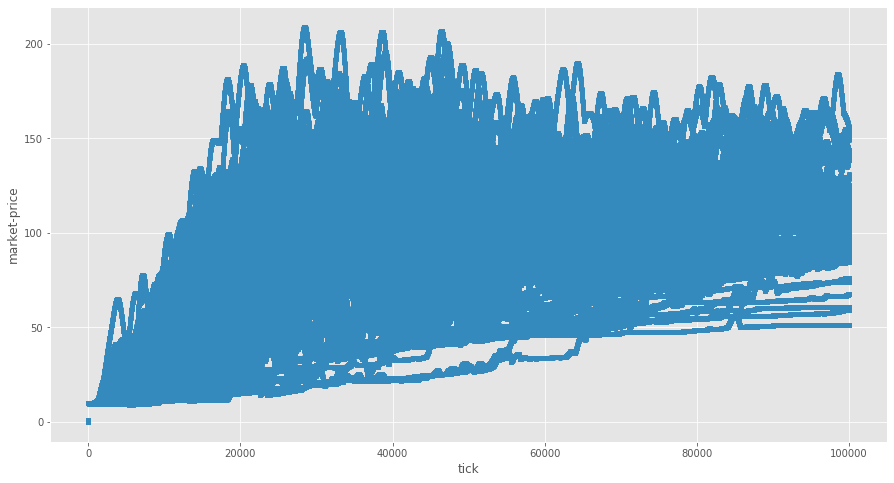

In [8]:
df1.plot.scatter(x='tick',y='market-price',figsize=(15,8))

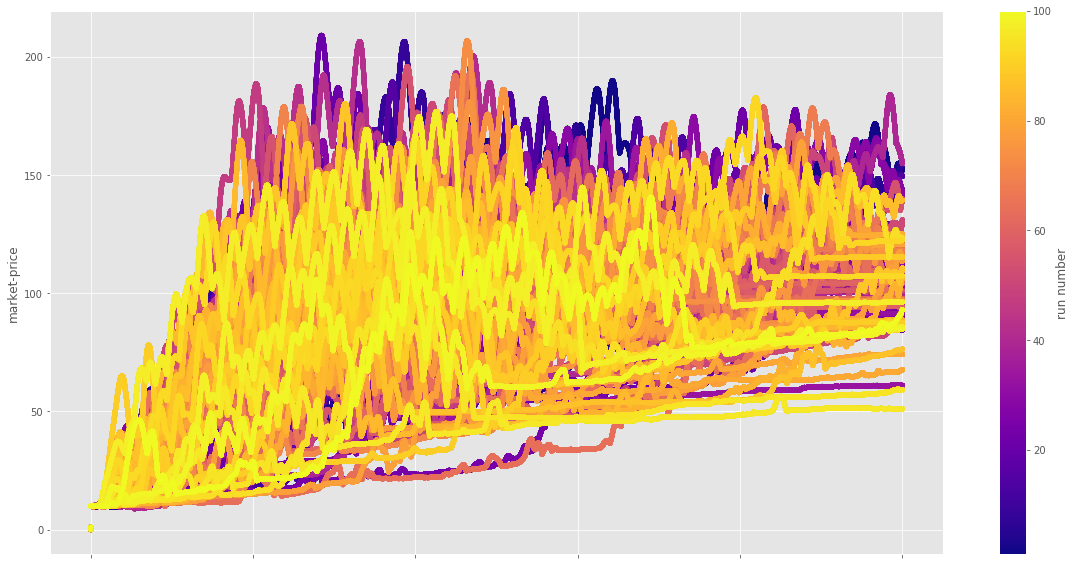

In [9]:
df1.plot.scatter(x='tick',y='market-price',c='run number',colormap='plasma',figsize=(20,10))

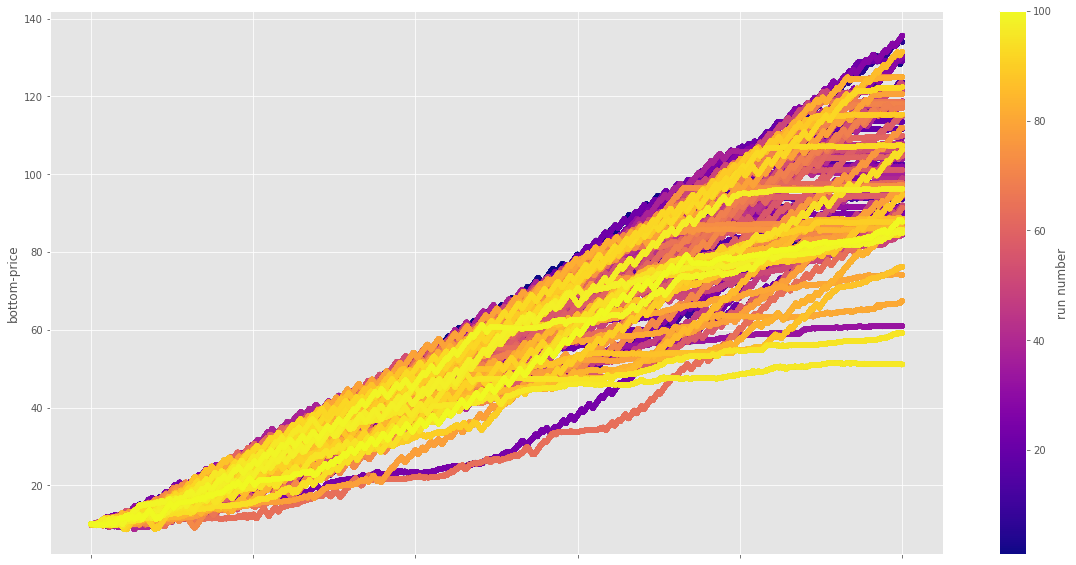

In [10]:
df1.plot.scatter(x='tick',y='bottom-price',c='run number',colormap='plasma',figsize=(20,10))

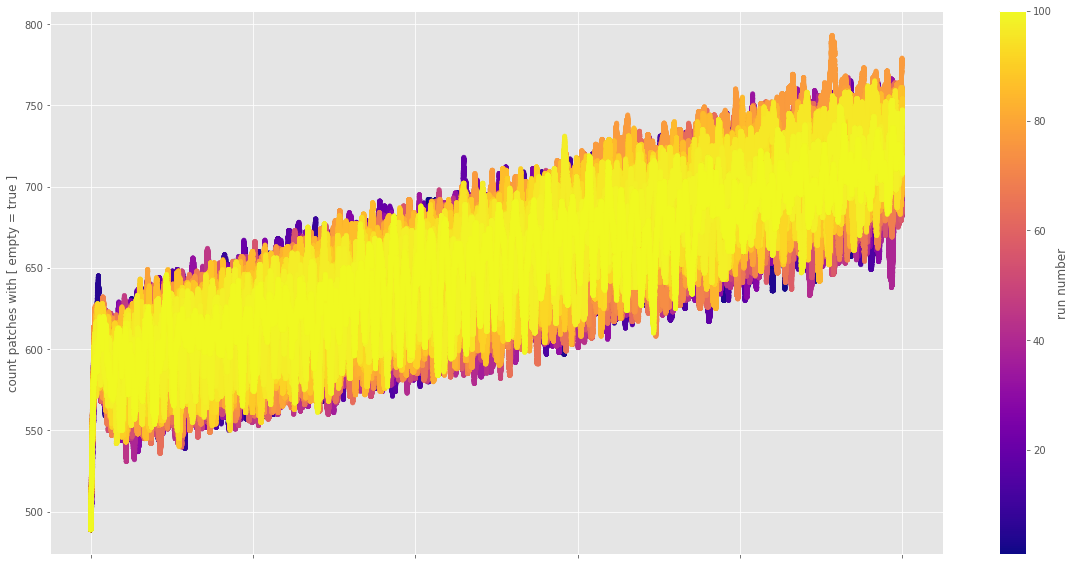

In [11]:
df1.plot.scatter(x='tick',y='count patches with [ empty = true ]',c='run number',colormap='plasma',figsize=(20,10))

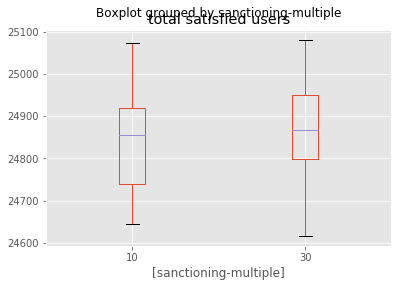

In [12]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total satisfied users'], by=['sanctioning-multiple'])
 
plt.show()

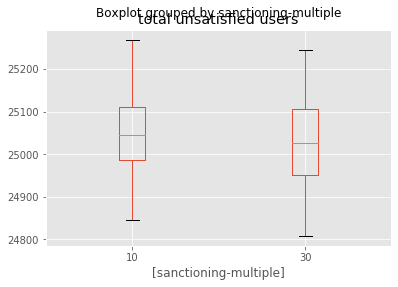

In [13]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total unsatisfied users'], by=['sanctioning-multiple'])

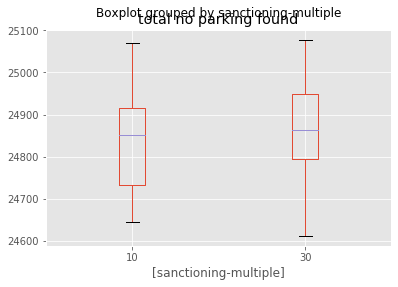

In [14]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total no parking found'], by=['sanctioning-multiple'])

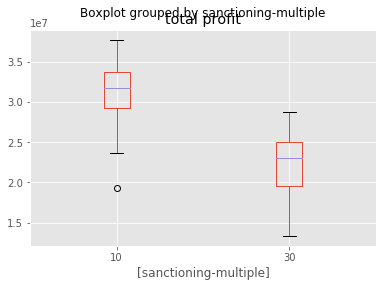

In [15]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total profit'], by=['sanctioning-multiple'])

Text(0, 0.5, 'Profit')

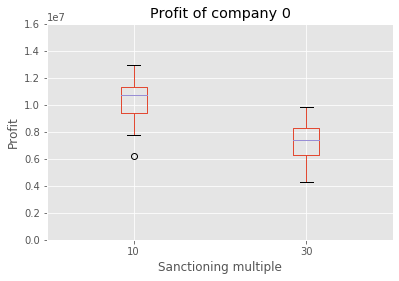

In [8]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 0'], by=['sanctioning-multiple'])
plt.ylim(0, 16000000 )
plot.get_figure().gca().set_title("Profit of company 0")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Sanctioning multiple")
plot.get_figure().gca().set_ylabel("Profit")

Text(0, 0.5, 'Profit')

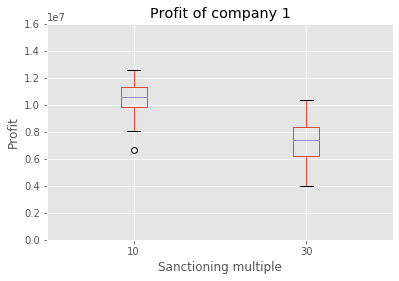

In [9]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 1'], by=['sanctioning-multiple'])
plt.ylim(0, 16000000 )
plot.get_figure().gca().set_title("Profit of company 1")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Sanctioning multiple")
plot.get_figure().gca().set_ylabel("Profit")

Text(0, 0.5, 'Profit')

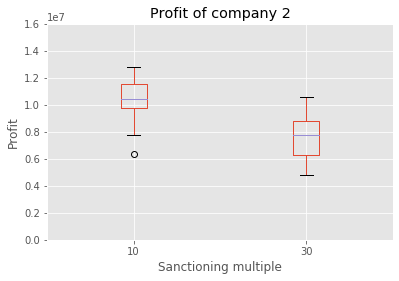

In [10]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 2'], by=['sanctioning-multiple'])
plt.ylim(0, 16000000 )
plot.get_figure().gca().set_title("Profit of company 2")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Sanctioning multiple")
plot.get_figure().gca().set_ylabel("Profit")

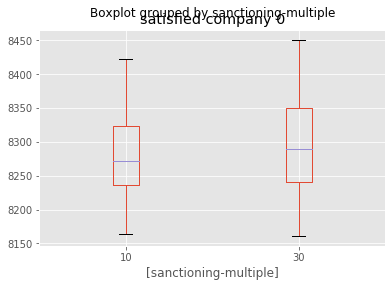

In [19]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 0'], by=['sanctioning-multiple'])

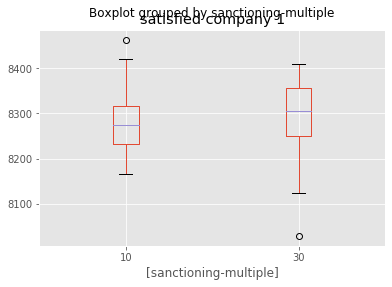

In [20]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 1'], by=['sanctioning-multiple'])

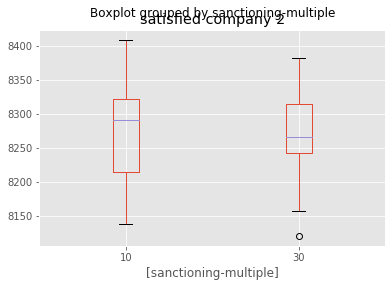

In [21]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 2'], by=['sanctioning-multiple'])

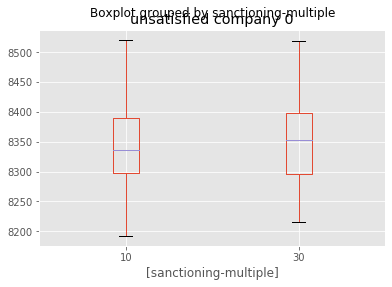

In [22]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 0'], by=['sanctioning-multiple'])

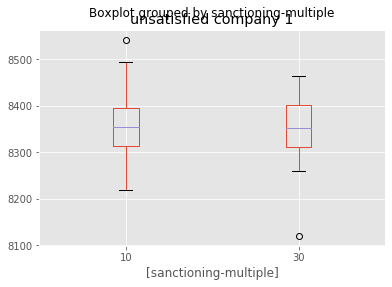

In [23]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 1'], by=['sanctioning-multiple'])

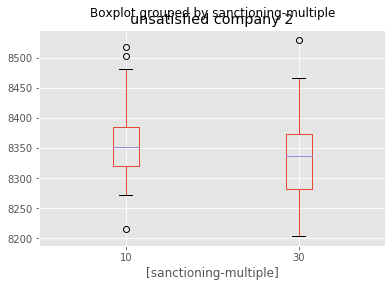

In [24]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 2'], by=['sanctioning-multiple'])

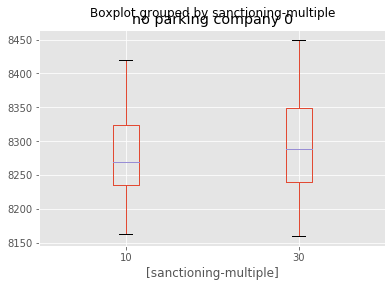

In [25]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 0'], by=['sanctioning-multiple'])

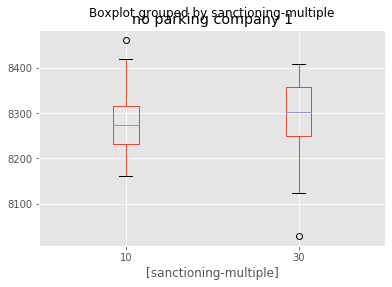

In [26]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 1'], by=['sanctioning-multiple'])

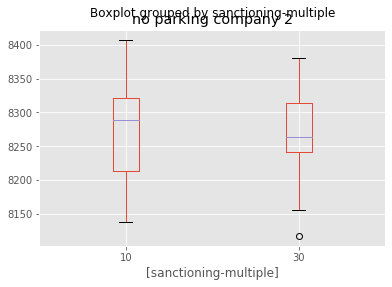

In [27]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 2'], by=['sanctioning-multiple'])

In [8]:
df2 = df1.loc[df1['sanctioning-multiple'] == 10 ]
df2.head(5)

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,4,True,True,10,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1,3,True,True,10,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
2,2,True,True,10,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
3,1,True,True,10,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
4,4,True,True,10,10,1,0,0,0,0,...,9.997,600,489,0,0,0,0,0,0,0.0


In [9]:
df3 = df1.loc[df1['sanctioning-multiple'] == 30 ]
df3.head(5)

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
4897240,51,True,True,30,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
4897243,51,True,True,30,10,1,0,0,0,0,...,9.997,599,490,0,0,0,0,0,0,0.0
4897247,51,True,True,30,10,2,0,0,0,0,...,9.994,599,490,0,0,0,0,1,0,0.0
4897251,51,True,True,30,10,3,0,0,0,0,...,9.997,598,491,0,0,0,0,1,0,0.0
4897254,51,True,True,30,10,4,0,0,0,0,...,10.000,598,491,0,0,0,0,1,0,0.0


In [30]:
df3.agg([np.mean, np.std])

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
mean,75.500000,1.0,1.0,30.0,10.0,50000.00000,4143.480375,4165.916483,4138.801694,4160.819715,...,53.425745,430.673267,654.898729,4143.116897,4138.471909,4132.559338,12415.199377,12482.644905,12414.148145,9.176288e+06
std,14.430871,0.0,0.0,0.0,0.0,28867.80502,2406.725952,2413.548968,2405.605191,2411.803737,...,29.255037,44.789911,44.377809,2406.424741,2405.325811,2396.294662,7207.199677,7227.639796,7206.282783,6.905078e+06


<ErrorbarContainer object of 3 artists>

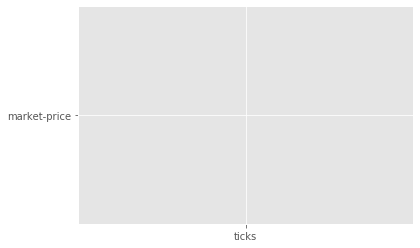

In [31]:
plt.errorbar(x = 'ticks', y = 'market-price')

In [10]:
df3_mean = df3['market-price'].mean()
print(df3_mean)
df3_std = df3['market-price'].std()
print(df3_std)

81.07119323687598
37.696629777001945


In [33]:
df3_mean2 = df3['count patches with [ empty = true ]'].mean()
print(df3_mean2)
df3_std2 = df3['count patches with [ empty = true ]'].std()
print(df3_std2)

654.8987288127119
44.37780920485552


In [34]:
df3_mean1 = df3['bottom-price'].mean()
print(df3_mean1)
df3_std1 = df3['bottom-price'].std()
print(df3_std1)

53.425744888963465
29.25503679122915


In [11]:
df2_mean = df2['market-price'].mean()
print(df2_mean)
df2_std = df2['market-price'].std()
print(df2_std)

89.67152812393341
38.43571986846374


In [36]:
df2_mean1 = df2['bottom-price'].mean()
print(df2_mean1)
df2_std1 = df2['bottom-price'].std()
print(df2_std1)

56.321372527094766
31.014192837439953


In [37]:
df2_mean2 = df2['count patches with [ empty = true ]'].mean()
print(df2_mean2)
df2_std2 = df2['count patches with [ empty = true ]'].std()
print(df2_std2)

653.739663203368
44.014859152993694


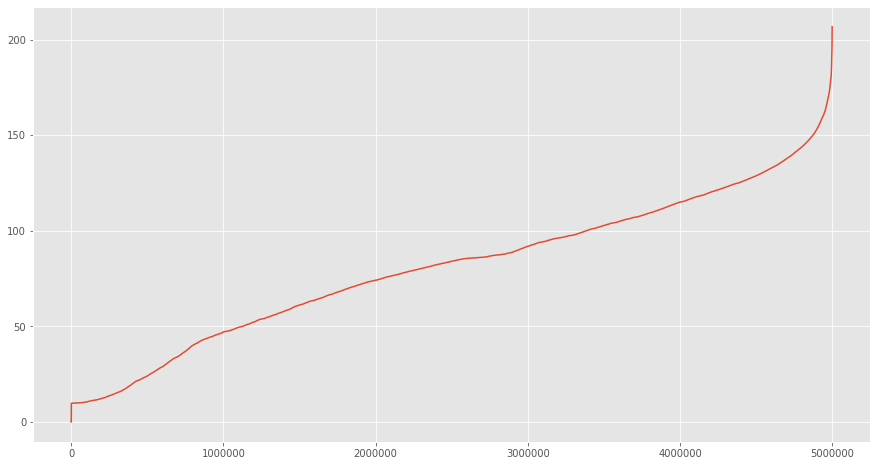

In [12]:
df3['market-price'].sort_values().plot(use_index=False,figsize=(15,8))

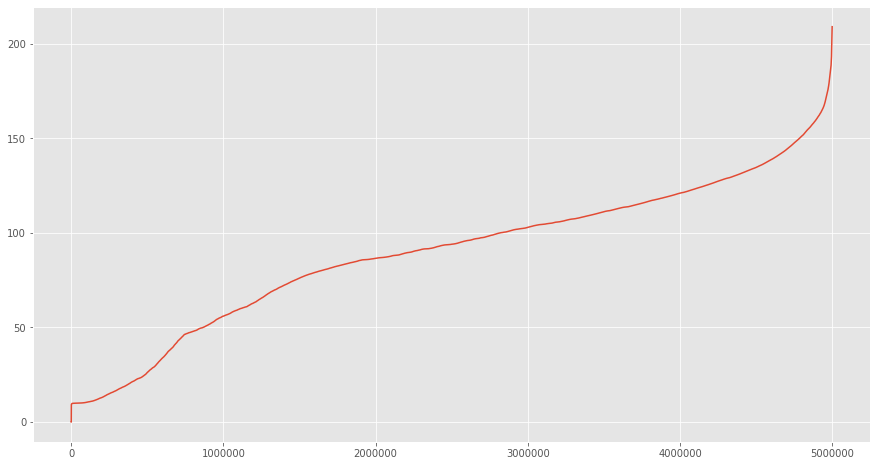

In [13]:
df2['market-price'].sort_values().plot(use_index=False,figsize=(15,8))

In [15]:
df2['market-price'].max()

209.07133333334198

In [ ]:
pearsoncorr = df1.corr(method='spearman')
pearsoncorr